<img src=images/RMS_Titanic_3_2.jpg align="right" width="25%" style="margin-right:0%"></div>
# Cleaning and Munging the Titanic Data Set with Pandas

### October 28,  2016 - CRMDA Python Workgroup - Week #7
### Presenter: Boryana S. Koseva

- This notebook was taken from https://github.com/mepa/titanic-data-munging and modified for this presentation.
- The files `train.csv` and `test.csv` were downloaded from https://www.kaggle.com/c/titanic/data.

The packages used for this presentation:
   - __pandas__ for structured data operations and manipulations. It is extensively used for data munging and preparation. Pandas were added relatively recently to Python and have been instrumental in boosting Python’s usage in data scientist community.
   
   - __numpy__ stands for Numerical Python. The most powerful feature of NumPy is n-dimensional array. This library also contains basic linear algebra functions, Fourier transforms,  advanced random number capabilities and tools for integration with other low level languages like Fortran, C and C++
   - __matplotlib__ for plotting vast variety of graphs, starting from histograms to line plots to heat plots. You can also use Latex commands to add math to your plot.
   - __seaborn__ for statistical data visualization. Seaborn is a library for making attractive and informative statistical graphics in Python. It is based on matplotlib. Seaborn aims to make visualization a central part of exploring and understanding data. To install seaborn, execute the following command in terminal/Anaconda command prompt:

> conda install seaborn

In [5]:
# sys library
import sys

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# set default size for figures
plt.rcParams['figure.figsize']=(16,12)

In [6]:
# Print version info
# It's always good to have a record of the versions which you are using when analyzing your data

print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)

python 3.5.2 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]

pandas 0.18.1
numpy 1.11.1
matplotlib 1.5.1
seaborn 0.7.1


### Load the Titanic Data Set

### VARIABLE DESCRIPTIONS:
- __Survived__:        Survival (0 = No; 1 = Yes)
- __Pclass__:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- __Name__:            Name
- __Sex__:             Sex
- __Age__:             Age
- __SibSp__:           Number of Siblings/Spouses Aboard
- __Parch__:           Number of Parents/Children Aboard
- __Ticket__:          Ticket Number
- __Fare__:            Passenger Fare
- __Cabin__:           Cabin
- __Embarked__:        Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

### SPECIAL NOTES:
- __Pclass__ is a proxy for socio-economic status (SES)
    - 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- __Age__ is in Years; Fractional if Age less than One (1)
    - If the Age is Estimated, it is in the form xx.5
- With respect to the family relation variables (i.e. __SibSp__ and __ParCh__) some relations were ignored.  The following are the definitions used for sibsp and parch.
    - _Sibling_:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    - _Spouse_:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    - _Parent_:   Mother or Father of Passenger Aboard Titanic
    - _Child_:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
    - Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [7]:
# Get train & test csv files as a DataFrame
# can specify data types when reading the csv file
titanic_df = pd.read_csv("data/train.csv", dtype={'Age': np.float64, 'SibSp': np.int64,})  

test_df  = pd.read_csv("data/test.csv")

titanic_df.head()   # Preview the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Column names
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
# We can refer to a column of data as:
names1 = titanic_df.Name
# or as below:
names2 = titanic_df['Name']
# Both give you the same thing.

In [12]:
### proof here... 
print(names1.head())
print('\n************************************************************\n')
print(names2.head())
print('\n************************************************************\n')
print(titanic_df['Name'].head())

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

************************************************************

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

************************************************************

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Hen

In [13]:
# Refer to a row with:
titanic_df.ix[0] #for first row

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [14]:
# Use python slicing techniques
# for first 6 rows of column 4:
titanic_df.ix[0:5,4] # df slicing [row,column]

0      male
1    female
2    female
3    female
4      male
5      male
Name: Sex, dtype: object

In [15]:
# You can call and manipulate a df at the same time:
kids = titanic_df[titanic_df['Age'] < 20]

# You can make this more complex:
alivekids = titanic_df[(titanic_df.Age < 20) & (titanic_df.Survived == 1)]

In [16]:
kids.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


In [17]:
alivekids.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


### Making plots and graphs

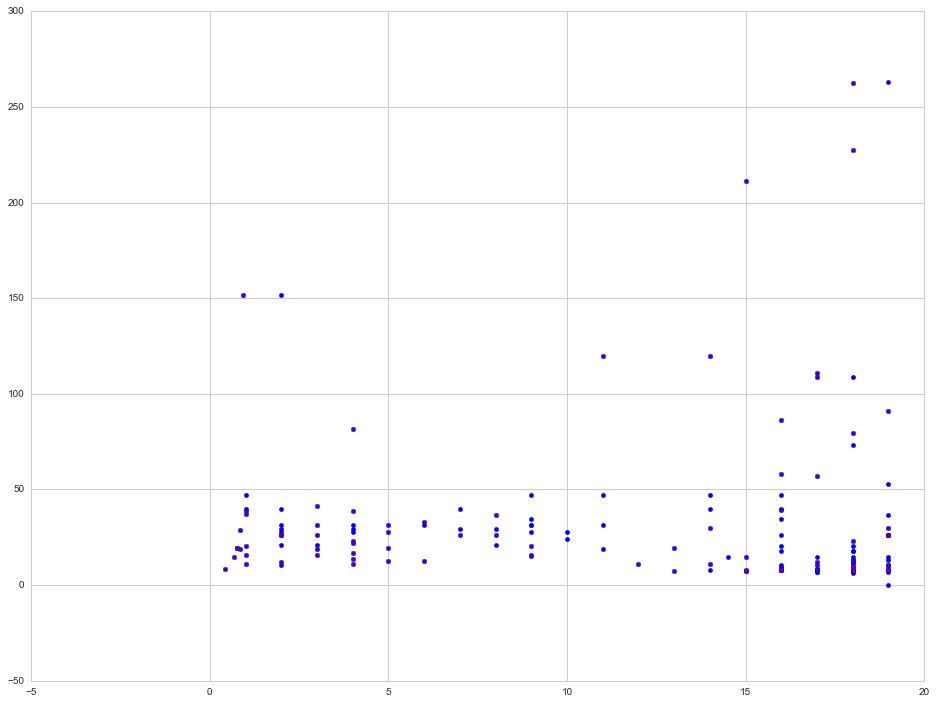

In [18]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(kids.Age,kids.Fare,marker='o',color='b')
ax.scatter(alivekids.Age, alivekids.Fare,marker='x',color='r')

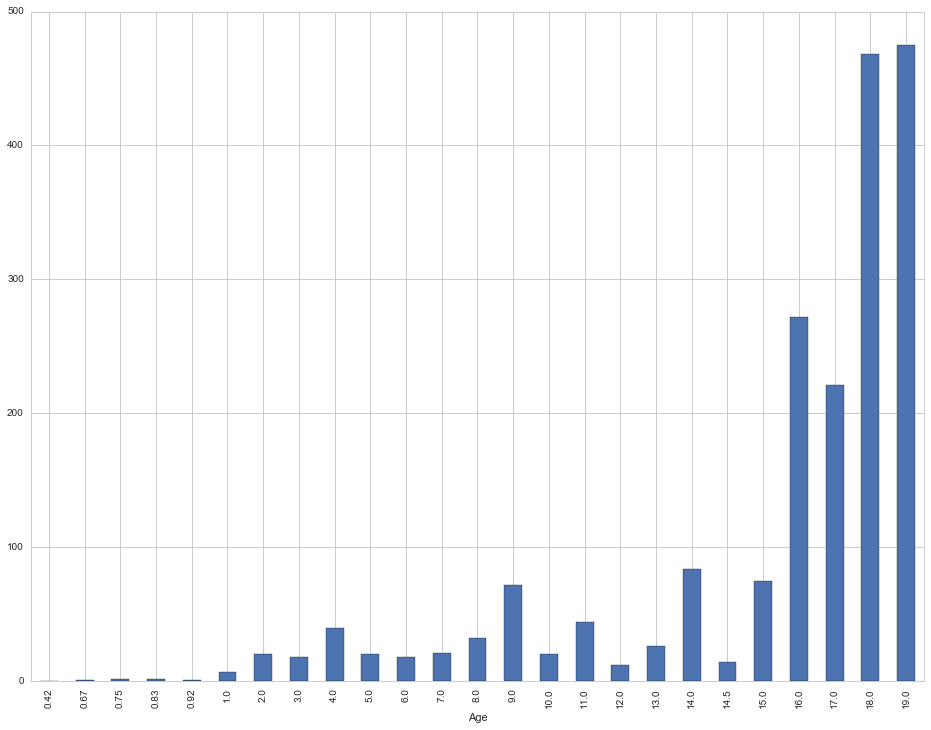

In [19]:
groupkids = kids.groupby('Age')
# We want the total number of kids at each age to make a bar graph.
groupkids['Age'].sum().plot(kind='bar')

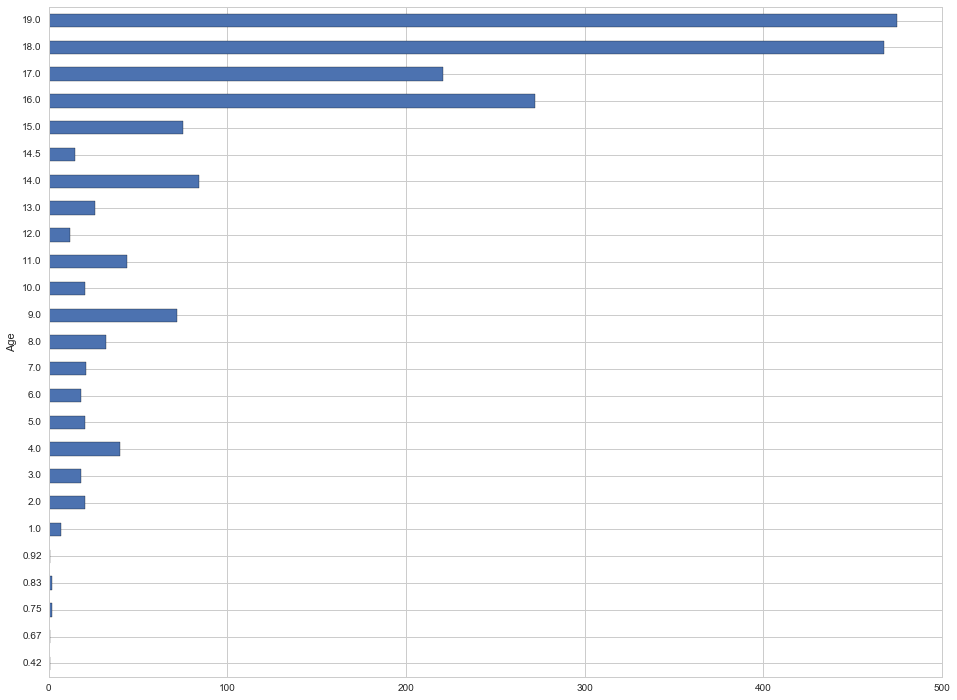

In [20]:
# a horizontal bar graph.
groupkids['Age'].sum().plot(kind='barh')
# same as 
# kids.groupby('Age')['Age'].sum().plot(kind='barh')

In [21]:
# Number of passengers in each class
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

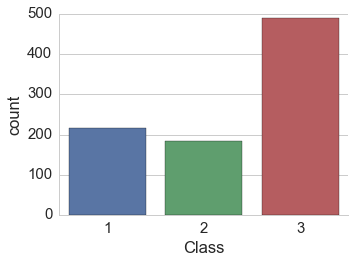

In [22]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
fg = sns.factorplot('Pclass', data=titanic_df, kind='count', aspect=1.25)
fg.set_xlabels('Class')

In [23]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

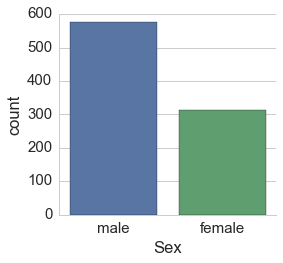

In [24]:
sns.factorplot('Sex', data=titanic_df, kind='count', aspect=1)

In [25]:
# Number of men and women in each of the passenger class.
titanic_df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

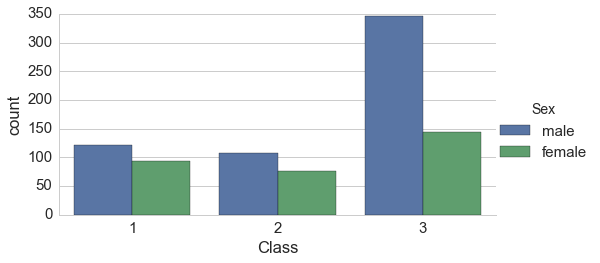

In [26]:
# Again use seaborn to group by Sex and class
g = sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

### Pivot Tables

In [27]:
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [28]:
# We can represent this same information another way using pivot_table.

# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
titanic_df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91.0,70.0,72.0,233.0
male,45.0,17.0,47.0,109.0
All,136.0,87.0,119.0,342.0


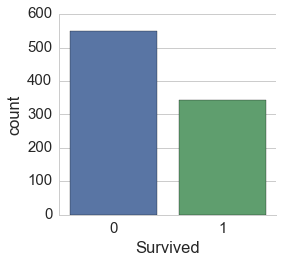

In [29]:
sns.factorplot('Survived', data=titanic_df, kind='count')

In [30]:
not_survived = titanic_df[titanic_df['Survived']==0]
len(not_survived)

549

In [31]:
# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3.0,6.0,72.0,81.0
male,77.0,91.0,300.0,468.0
All,80.0,97.0,372.0,549.0


### Crosstab and unstacking

In [32]:
# Passengers who survived and who didn't survive grouped by class and sex
table = pd.crosstab(index=[titanic_df.Survived,titanic_df.Pclass], columns=[titanic_df.Sex,titanic_df.Embarked])
table

Sex             female         male         
Embarked             C   Q   S    C   Q    S
Survived Pclass                             
0        1           1   0   2   25   1   51
         2           0   0   6    8   1   82
         3           8   9  55   33  36  231
1        1          42   1  46   17   0   28
         2           7   2  61    2   0   15
         3          15  24  33   10   3   34

In [33]:
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [34]:
print(table.columns)
print(table.index)

MultiIndex(levels=[['female', 'male'], ['C', 'Q', 'S']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['Sex', 'Embarked'])
MultiIndex(levels=[[0, 1], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=['Survived', 'Pclass'])


In [35]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

### Basic statistics

In [36]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively.'%(titanic_df.Age.mean(), 
        titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively.


In [37]:
titanic_df.Age.describe()

/Users/boryana/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [38]:
# Drop missing values for the records in which age passenger is missing
age = titanic_df['Age'].dropna()
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/Users/boryana/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


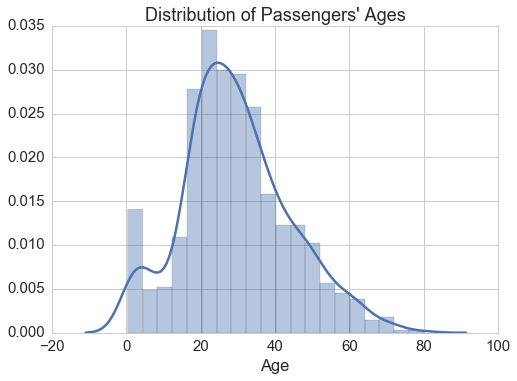

In [39]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")
# ignore the warning

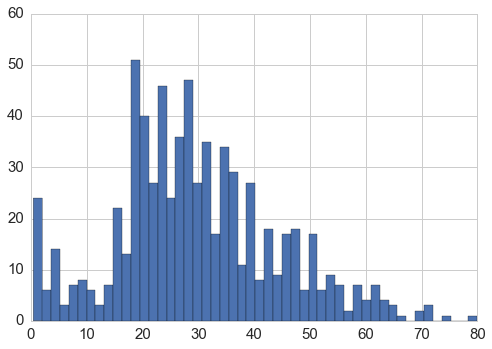

In [40]:
# Another way to plot a histogram of ages is shown below
titanic_df['Age'].hist(bins=50)

### Modifying your data to learn more

In [41]:
# Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [42]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

# Let's have a look at the first 10 rows of the data frame
titanic_df[:5] # same as titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


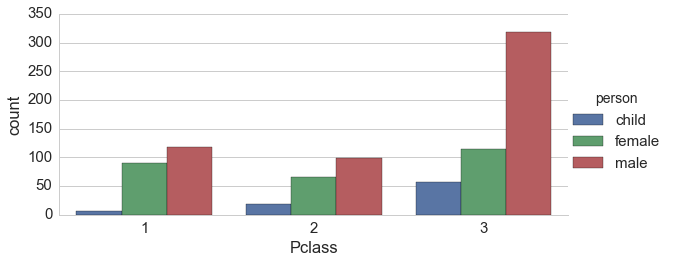

In [43]:
# Let's do a factorplot of passengers split into sex, children and class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=2)

In [44]:
# Count number of men, women and children
titanic_df['person'].value_counts()


male      537
female    271
child      83
Name: person, dtype: int64

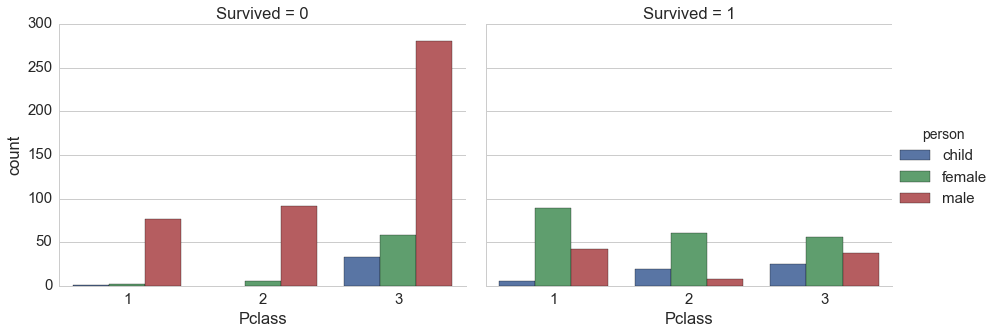

In [45]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', col='Survived', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1.25, size=5)

### What cabins did the Passengers stay in?

In [46]:
deck = titanic_df['Cabin'].dropna() # We just want to look at the non-empty values
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [47]:
# Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])

d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

* Really handy and frequently used Python data type - Container datatype called Counter (https://pymotw.com/2/collections/counter.html)

In [48]:
from collections import Counter 
Counter(d) # can take a list and count the items in the list

Counter({'A': 15, 'B': 47, 'C': 59, 'D': 33, 'E': 32, 'F': 13, 'G': 4, 'T': 1})

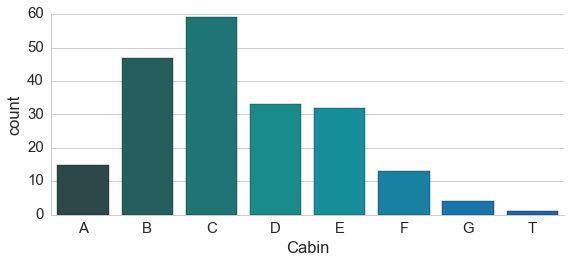

In [49]:
# Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
cabin_df = DataFrame(d)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G','T'], aspect=2, 
              palette='winter_d')

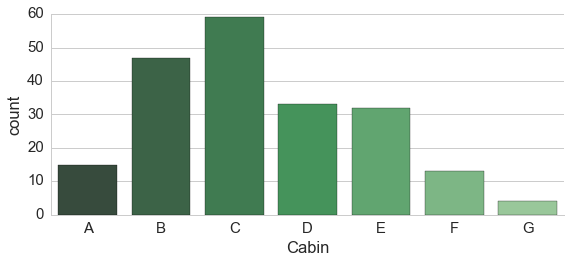

In [50]:
# Drop the 'T' cabin
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

# Then replot the Cabins factorplot as above
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='Greens_d')

* matplotlib colormaps - http://matplotlib.org/examples/color/colormaps_reference.html

### Where did the passengers come from i.e. Where did the passengers land into the ship from?

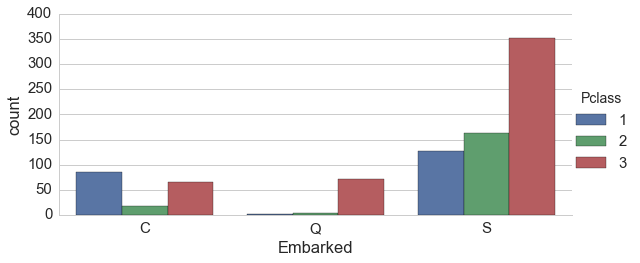

In [51]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

In [52]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [54]:
port.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [55]:
port.columns

Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object')

In [56]:
port.index=[['First','Second','Third']]

In [57]:
port

,Cherbourg,Queenstown,Southampton
First,85,2,127
Second,17,3,164
Third,66,72,353


### Who was alone and who was with parents or siblings?

In [58]:
titanic_df[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [60]:
# Add Alone column to indicate whether the passenger was alone or with family

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df.loc[titanic_df['Alone']>0, 'Alone'] = 'With family'
titanic_df.loc[titanic_df['Alone']==0, 'Alone'] = 'Alone'


titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


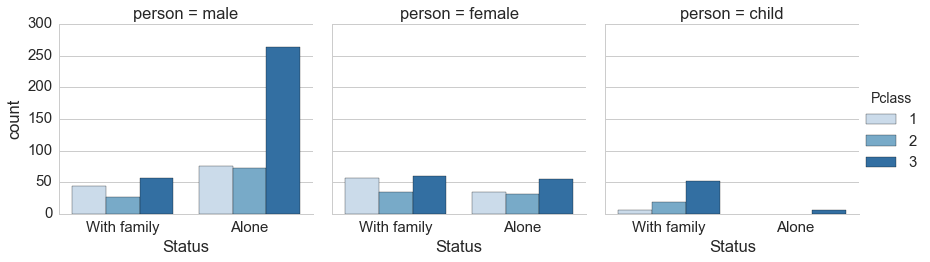

In [61]:
fg=sns.factorplot('Alone', data=titanic_df, kind='count', hue='Pclass', col='person', hue_order=range(1,4),
                 palette='Blues')
fg.set_xlabels('Status')

## Factors Affecting the Surviving

In [77]:
'''Now lets look at the factors that help someone survived the sinking. We start this analysis by adding a new
cloumn to the titanic data frame. Use the Survived column to map to the new column with factors 0:no and 1:yes
using the map method'''

titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


### Class Factor 

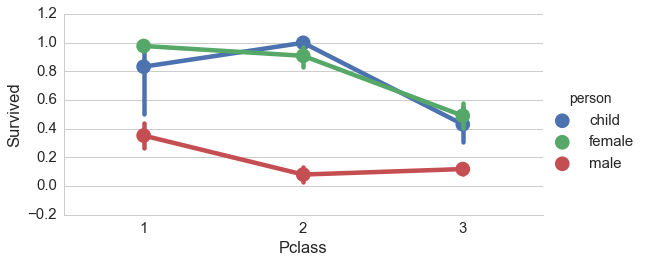

In [79]:
# Survived vs. class Grouped by gender
sns.factorplot('Pclass','Survived', hue='person', data=titanic_df, order=range(1,4), 
               hue_order = ['child','female','male'], aspect=2)

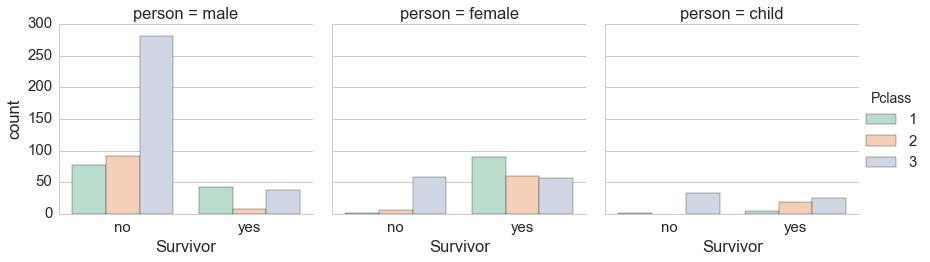

In [80]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person')

### Age Factor

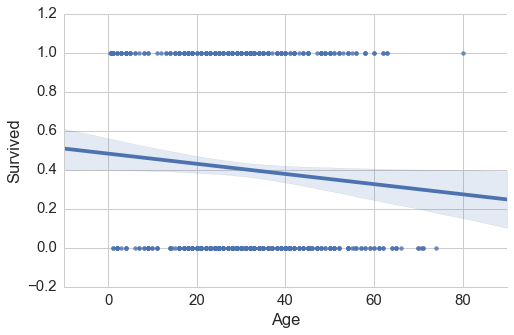

In [81]:
# Linear plot of age vs. survived

sns.lmplot('Age', 'Survived', data=titanic_df, aspect=1.5)

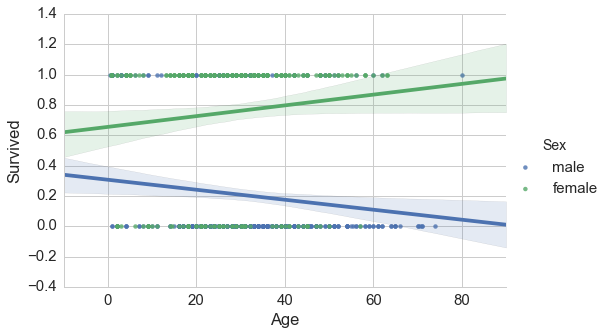

In [82]:
# Survived vs. Age grouped by Sex

sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex', aspect=1.5)

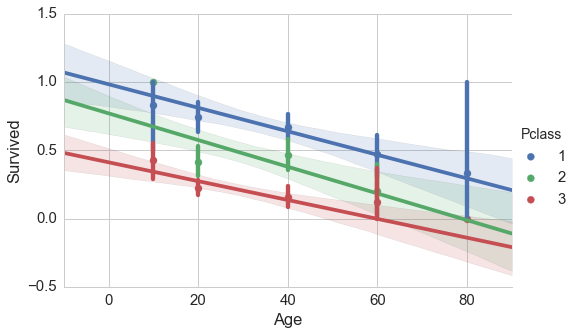

In [83]:
# Create a generation bin

generations = [10,20,40,60,80] 
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations, hue_order=[1,2,3], aspect=1.5)

### Deck Factor

In [84]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'person', 'Alone',
       'Survivor'],
      dtype='object')

In [70]:
# drop all the rows that contain NA's for Cabin

titanic_DF = titanic_df.dropna(subset=['Cabin'])

In [71]:
d[0:10]
# Does d.head() work here? Why/why not?

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [72]:
len(titanic_DF), len(d), titanic_df.shape # many rows were dropped when we removed the NA for Cabins

(204, 204, (891, 15))

In [73]:
titanic_DF.ix[:,'Deck'] = d

# let's see what we did
titanic_DF.head()


/Users/boryana/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/boryana/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


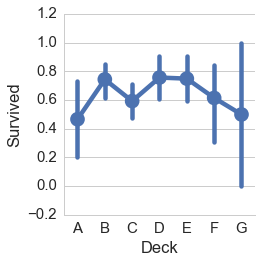

In [74]:
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B','C','D','E','F','G'])

### Family Status Factor

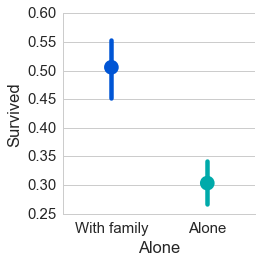

In [75]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter') 

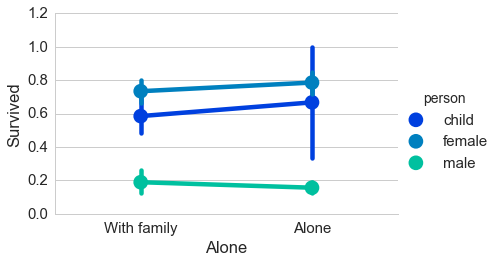

In [76]:
# let's check how gender contributes

sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter', hue='person', 
               hue_order=['child', 'female', 'male'], aspect=1.5)